In [20]:
# Importar librerias y cargar datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from posixpath import sep
import seaborn as sns
dato = pd.read_csv("/content/esperanza-vida.csv", sep=",")
print(dato.head())

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106


In [19]:
# Limpieza de datos
# ------
# Verificiar y eliminar valores nulos

print("\nValores nulos por columna:")
print(dato.isnull().sum())


Valores nulos por columna:
country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64


In [18]:
# Eliminar filas con valores nulos si es necesario
datos = dato.dropna()
print(f"\n Datos despues de limpieza: {datos.shape[0]} filas, {datos.shape[1]} columnas")


 Datos despues de limpieza: 1704 filas, 6 columnas


In [31]:
# ----
# Paso 3. Selección de años clave
# ---

# Seleccionamos años cada 20 años para ver evolución
años_seleccionados = [1952,1972,1992,2007]

In [16]:
# Filtrar datos para los seleccionados
datos_años = datos[datos["year"].isin(años_seleccionados)]

In [17]:
print("\nDatos para años sleccionados:")
print(datos_años[("year")].value_counts())


Datos para años sleccionados:
year
1952    142
1972    142
1992    142
2007    142
Name: count, dtype: int64


In [36]:
## Paso 4: Calculos estadisticos
# Calcular estadisticas descriptivas por años
print("\nEstadisticas descriptivas por año:")
for año in años_seleccionados:
  datos_año = datos[datos["year"] == año]["lifeExp"]
  print(f"\nAño: {año}:")
  print(f" Media: {datos_año.mean():.2f} años")
  print(f" Mediana: {datos_año.median():.2f} años")
  print(f" Desviación estándar: {datos_año.std():.2f} años")


Estadisticas descriptivas por año:

Año: 1952:
 Media: 49.06 años
 Mediana: 45.14 años
 Desviación estándar: 12.23 años

Año: 1972:
 Media: 57.65 años
 Mediana: 56.53 años
 Desviación estándar: 11.38 años

Año: 1992:
 Media: 64.16 años
 Mediana: 67.70 años
 Desviación estándar: 11.23 años

Año: 2007:
 Media: 67.01 años
 Mediana: 71.94 años
 Desviación estándar: 12.07 años


In [39]:
# Calcular cuartiles
print("\nCuartiles por año:")
for año in años_seleccionados:
  cuartiles = datos[datos["year"] == año] ["lifeExp"].quantile([0.25,0.5,0.75])
  print(f"\nAño {año}:")
  print(f"Q1 (25%): {cuartiles[0.25]:.2f} años")
  print(f"Q2 (50%): {cuartiles[0.5]:.2f} años")
  print(f"Q3 (75%): {cuartiles[0.75]:.2f} años")


Cuartiles por año:

Año 1952:
Q1 (25%): 39.06 años
Q2 (50%): 45.14 años
Q3 (75%): 59.77 años

Año 1972:
Q1 (25%): 48.50 años
Q2 (50%): 56.53 años
Q3 (75%): 69.25 años

Año 1992:
Q1 (25%): 56.12 años
Q2 (50%): 67.70 años
Q3 (75%): 72.58 años

Año 2007:
Q1 (25%): 57.16 años
Q2 (50%): 71.94 años
Q3 (75%): 76.41 años


In [40]:
## ---
## Paso 5: top 5 paises con mejor y peor esperanza de vida
## ---
# Para el año más (2007)
datos_2007 = datos[datos["year"] == 2007]
datos_2007

,country,year,pop,continent,lifeExp,gdpPercap
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356.0,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798
1679,Yemen Rep.,2007,22211743.0,Asia,62.698,2280.769906
1691,Zambia,2007,11746035.0,Africa,42.384,1271.211593


In [43]:
# Top 5 paises con mejor esperanza de vida

top_5 = datos_2007.nlargest(5,"lifeExp")[["country","lifeExp"]]
print("\nTop 5 paises con mejor esperanza de vida en 2007:")
print(top_5.round(2))

# Top 5 paises con peor esperanza de vida
bottom_5 = datos_2007.nsmallest(5,"lifeExp")[["country","lifeExp"]]
print("\nTop 5 países con peor esperanza de vida en 2007: ")
print(bottom_5.round(2))


Top 5 paises con mejor esperanza de vida en 2007:
              country  lifeExp
803             Japan    82.60
671   Hong Kong China    82.21
695           Iceland    81.76
1487      Switzerland    81.70
71          Australia    81.24

Top 5 países con peor esperanza de vida en 2007: 
           country  lifeExp
1463     Swaziland    39.61
1043    Mozambique    42.08
1691        Zambia    42.38
1355  Sierra Leone    42.57
887        Lesotho    42.59


In [44]:
## ---
## Paso 6: Analisis por continente
## ---
# Esperanza de vida promedio por continente
print("\nEsperanza de vida promedio por continente en 2007:")
print(datos_2007.groupby("continent")["lifeExp"].mean().round(2))


Esperanza de vida promedio por continente en 2007:
continent
Africa      54.81
Americas    73.61
Asia        70.73
Europe      77.65
Oceania     80.72
Name: lifeExp, dtype: float64


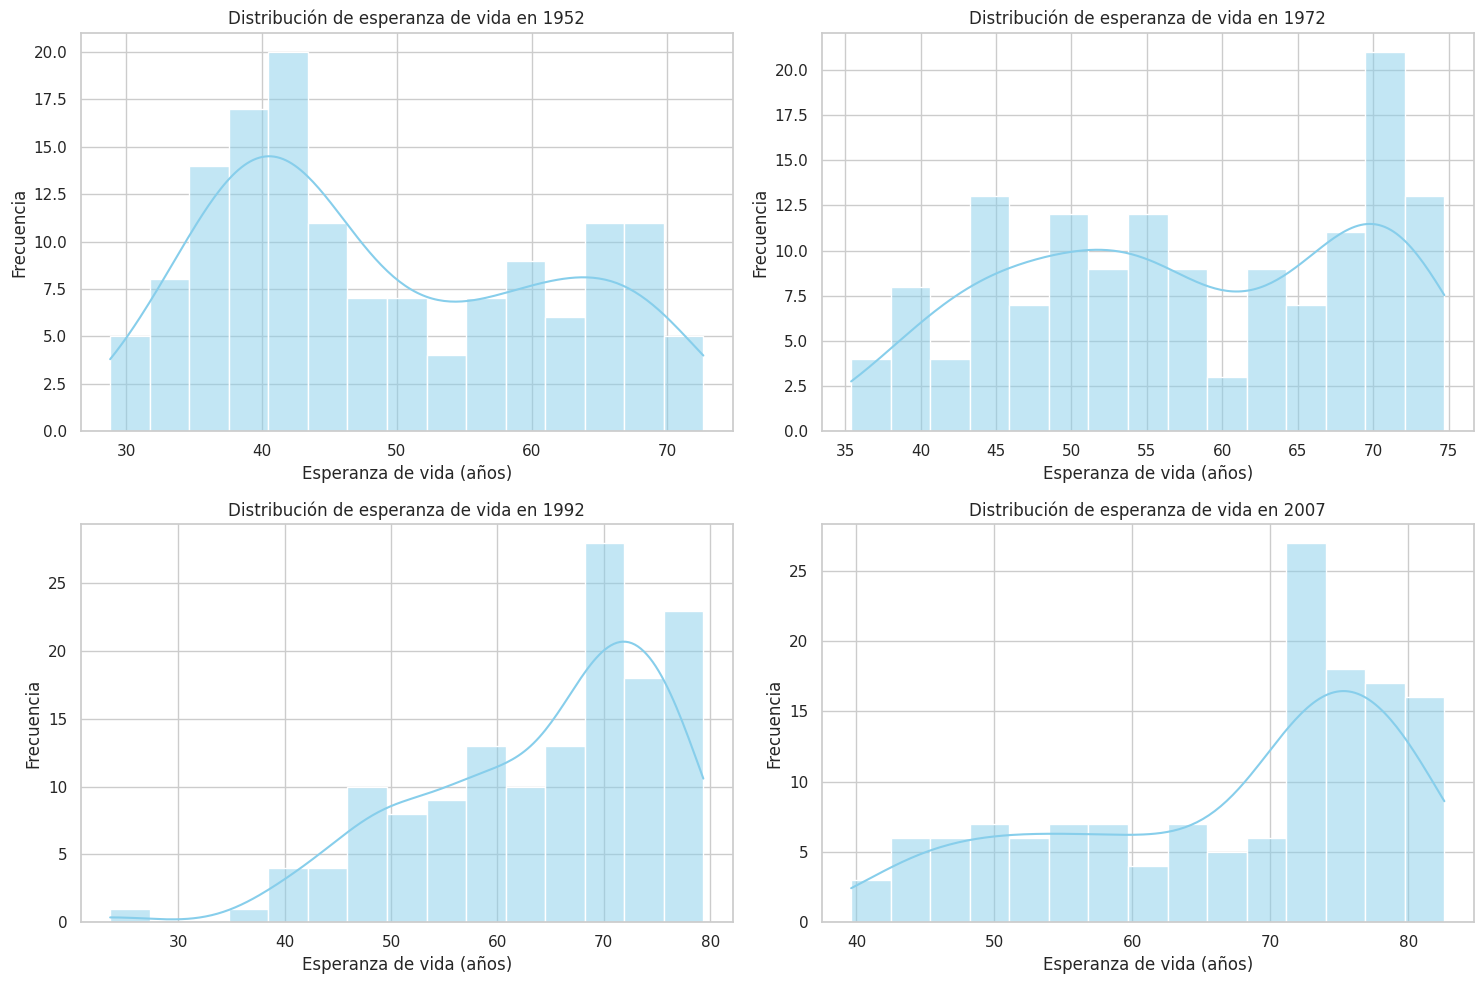

In [47]:
## Paso 7: Visualización
## --
# Configuración de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))

# 1. Histogramas de distribución por año
for i, año in enumerate(años_seleccionados,1):
  plt.subplot(2,2,i)
  sns.histplot(data=datos[datos["year"] == año], x="lifeExp",bins=15,kde=True,color="skyblue")
  plt.title(f"Distribución de esperanza de vida en {año}")
  plt.xlabel("Esperanza de vida (años)")
  plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


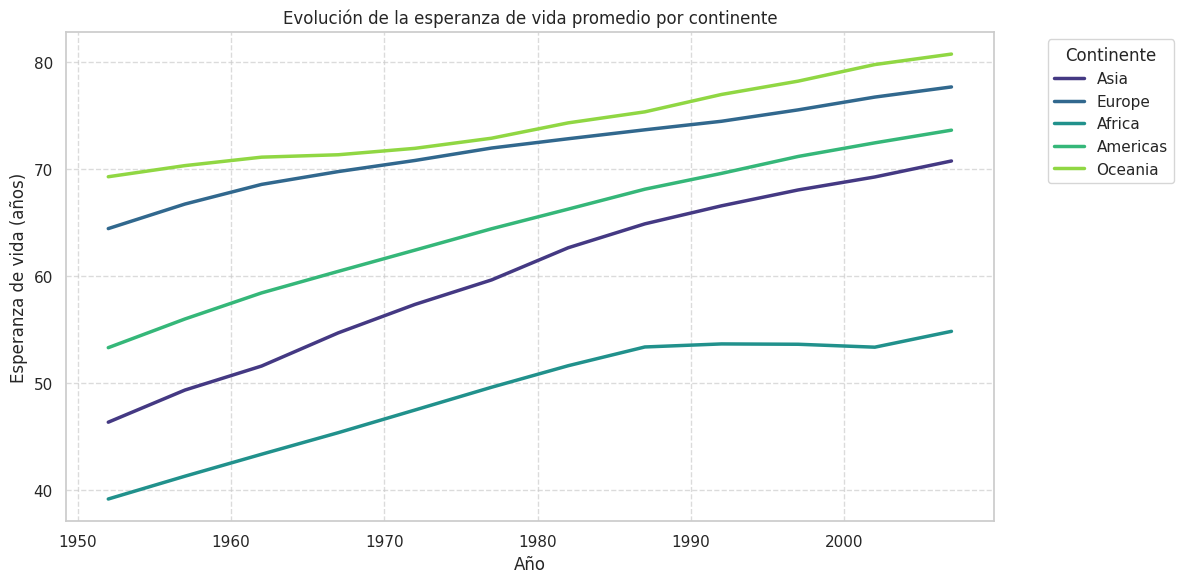

In [53]:
# 2. Evolución de esperanza de vida promedio por continente
plt.figure(figsize=(12,6))
sns.lineplot(data=datos, x="year", y="lifeExp", hue="continent", errorbar=None,palette="viridis",linewidth=2.5) # Remplaza ci=none
plt.title("Evolución de la esperanza de vida promedio por continente")
plt.xlabel("Año")
plt.ylabel("Esperanza de vida (años)")
plt.legend(title="Continente", bbox_to_anchor=(1.05,1), loc="upper left") # Mejor posición de leyenda
plt.grid(True, linestyle="--",alpha=0.7)
plt.tight_layout()
plt.show()

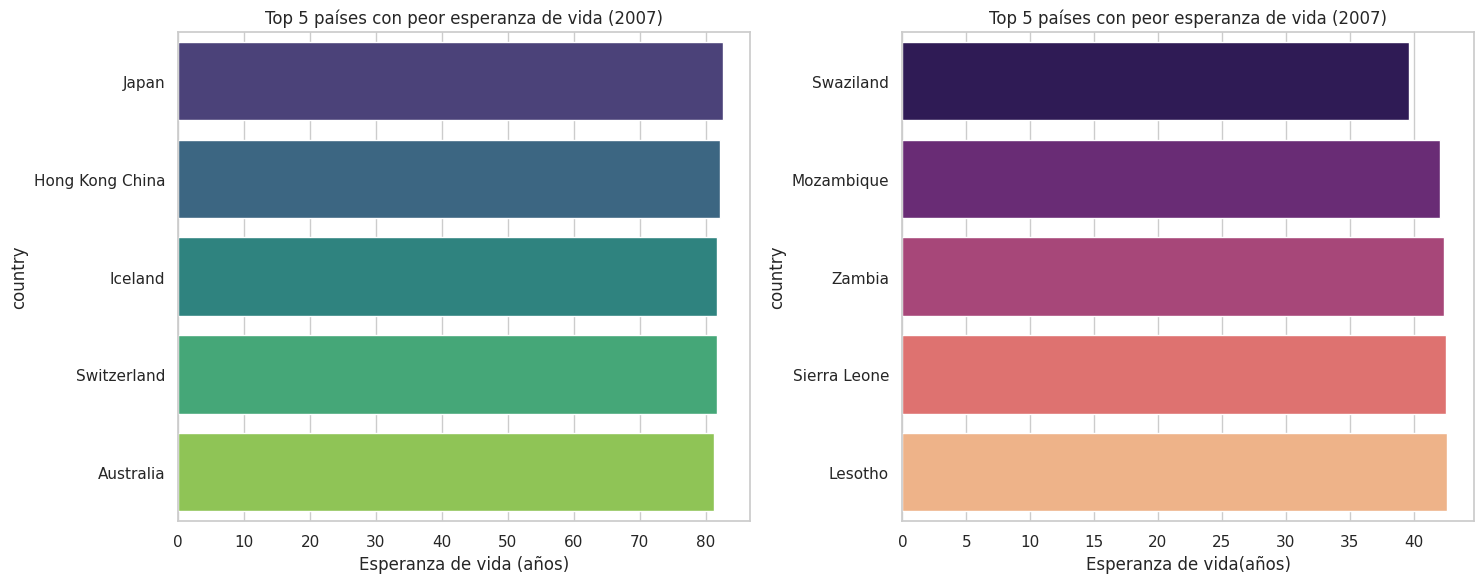

In [56]:
# 3. Gráfico de barras para arriba y para abajo por países
plt.figure(figsize=(15,6))

# arriba 5 paises
plt.subplot(1,2,1)
sns.barplot(data=top_5, x="lifeExp", y="country", hue="country",palette="viridis", dodge=False,legend=False)
plt.title("Top 5 países con peor esperanza de vida (2007)")
plt.xlabel("Esperanza de vida (años)")

# abajo 5 paises

plt.subplot(1,2,2)
sns.barplot(data=bottom_5, x="lifeExp", y="country", hue="country",palette="magma", dodge=False,legend=False)
plt.title("Top 5 países con peor esperanza de vida (2007)")
plt.xlabel("Esperanza de vida(años)")


plt.tight_layout()
plt.show()